In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./MNISTdataset/train.csv')

In [3]:
print(df.shape)

(42000, 785)


In [4]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = df.values

In [7]:
print(data.shape)

(42000, 785)


In [8]:
type(data)

numpy.ndarray

In [9]:
x = data[:, 1:]
y = data[:, 0]

In [10]:
print(x.shape,y.shape)

(42000, 784) (42000,)


In [11]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
print(y)

[1 0 1 ... 7 6 9]


In [13]:
# train test split
split = int(0.8 * x.shape[0])

In [14]:
split

33600

In [ ]:
# splitting the x and y variables in 80% training use and 20% testing use

In [15]:
x_train = x[:split, :]
y_train = y[:split]

In [16]:
x_test = x[split:,:]
y_test = y[split:]

In [17]:
print(x_train.shape, y_train.shape)

(33600, 784) (33600,)


In [18]:
print(x_test.shape, y_test.shape)

(8400, 784) (8400,)


In [19]:
# Visualise some samples

In [26]:
def drawImage(sample):
    
    #reshape the image (because the image is in flattened array)
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

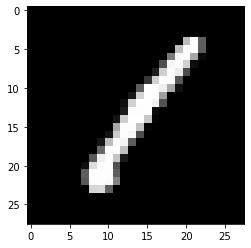

1


In [28]:
drawImage(x_train[0])
print(y_train[0])

In [30]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

# KNN Algo

def knn(x, y, querypoint, k=5):
    
    # Pick K Nearest Neighbours
    
    vals = []
    
    # for every point in the x
    for i in range(x.shape[0]):
        
        # compute distance
        d = distance(querypoint, x[i])
        vals.append((d, y[i]))
        
#     print(vals)
    
    # 2. Sort the array and find k nearest points
    vals = sorted(vals)
    
    vals = vals[:k]
    
    # Majority vote
    
    vals = np.array(vals)
    
    new_values = np.unique(vals[:, 1], return_counts=True) # majority count of y values
    print(new_values)
    
    #index of the maximum count and this 1 will be the count and argmax() will give the index
    index = new_values[1].argmax()  
    
    # map this index with my data and this 0 is the data given
    pred = new_values[0][index] 
    
    return pred

In [36]:
# make predictions over test images

pred = knn(x_train, y_train, x_test[25])

(array([1., 8.]), array([1, 4], dtype=int64))


In [37]:
pred

8.0

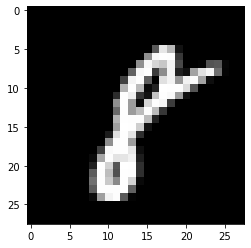

In [38]:
drawImage(x_test[25])

In [40]:
print(y_test[25])

8


In [ ]:
#what is the task?
you have to compute the accuracy of this project 

you have xtest values
you have ytest values
you have to make predictions over xtest and then compare